In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.stats import binom, geom, norm
from typing import List, Union, Tuple
import random, itertools


# Permutations and Combinations

In [4]:
def calculate_permutation(n: int, r: int) -> int:
    """
    Calculate permutation (nPr) - order matters
    
    Args:
        n (int): Total number of items
        r (int): Number of items being chosen
    
    Returns:
        int: Number of possible permutations
    """
    if n < r:
        raise ValueError("n must be greater than or equal to r")
    return math.factorial(n) // math.factorial(n - r)

def calculate_combination(n: int, r: int) -> int:
    """
    Calculate combination (nCr) - order doesn't matter
    
    Args:
        n (int): Total number of items
        r (int): Number of items being chosen
    
    Returns:
        int: Number of possible combinations
    """
    if n < r:
        raise ValueError("n must be greater than or equal to r")
    return math.factorial(n) // (math.factorial(r) * math.factorial(n - r))


In [5]:
n_perm = calculate_permutation(5, 3)  # 5P3 - should be 60
n_comb = calculate_combination(5, 3)  # 5C3 - should be 10
print("permutation (5,3):", n_perm)
print("combination (5,3):", n_comb)

permutation (5,3): 60
combination (5,3): 10


# Bayesian Probability

In [6]:
def bayesian_probability(prior: float, likelihood: float, evidence: float) -> float:
    """
    Calculate posterior probability using Bayes' theorem
    P(A|B) = P(B|A) * P(A) / P(B)
    
    Args:
        prior (float): P(A) - Prior probability
        likelihood (float): P(B|A) - Likelihood
        evidence (float): P(B) - Evidence
    
    Returns:
        float: Posterior probability P(A|B)
    """
    if not all(0 <= x <= 1 for x in [prior, likelihood, evidence]):
        raise ValueError("All probabilities must be between 0 and 1")
    if evidence == 0:
        raise ValueError("Evidence probability cannot be zero")
    
    posterior = (likelihood * prior) / evidence
    return posterior

In [7]:

posterior = bayesian_probability(
    prior=0.3,      # P(A)
    likelihood=0.7,  # P(B|A)
    evidence=0.4     # P(B)
)  # should be 0.525
print("bayesian probability (prior=0.3, likelihood=0.7, evidence=0.4):", f"{posterior:.5f}")


bayesian probability (prior=0.3, likelihood=0.7, evidence=0.4): 0.52500


## Bayes probability visualization
Ex: you have a population of 10000 that's 23% infected.
A new virus test has a 85% TP rate and a 20% FP rate. You can use this to visualize:  
* the probability a tester is infected, given they've tested positive: 
    * P(sick|tested positive) -> *" P(Condition + | Test +) "*
* the probability a tester is not infected, given they've tested positive: 
    * P(not sick | tested positive ) -> *" P(Condition - | Test +) "*
* the number of people in the full population that's expected to TP 
    * ie, P(TP in population) -> ex, *"25% \* 2500 = 625"* in blue box
* the number of people in the population that's expected to FP 
    * ie, P(FP in population) -> (ex, *"25% \* 2500 = 625"* in red box) 
* the percentage of the full population that tests TP (sick AND positive)
    * ie, P( Condition+ ⋂ Test+ ) ->  *"(x% of total)"* in the blue box
* the percentage of the full population that tests FP (not sick AND positive)
    * ie, P( Condition- ⋂ Test+ ) -> *"(y% of total)"* in the red box

Notes:  
* The `big box` in the background represents the population. The left side is the sick side **(Condition +)**, and the right side is the non-sick side **(Condition -)**. The sides are **proportionately sized to their percent of the population** (ex, 23% sick rate = 23% total box area)
* The `small red and blue boxes`, respectively, are **also proportionally sized** to represent the percent of the population that is TP (actually sick, and test says they're sick) and FP (not sick, but test says sick). For example, if 50% TP rate, the blue box will be 50% of the full sick population. 
* Based on a method I learned from a university professor I took at UT Dallas (Credit to Avanti Sethi): https://www.youtube.com/watch?v=piCJ70jFvYE

In [ ]:
def bayes_theorem(prior_probability, likelihood, evidence):
    """
    Calculate posterior probability using Bayes' Theorem
    
    Parameters:
    prior_probability (float): P(A), the prior probability of hypothesis A
    likelihood (float): P(B|A), the likelihood of evidence B given hypothesis A
    evidence (float): P(B), the total probability of evidence B
    
    Returns:
    float: P(A|B), the posterior probability of hypothesis A given evidence B
    """
    posterior_probability = (prior_probability * likelihood) / evidence
    return posterior_probability


def calculate_evidence(prior_probability, likelihood, alternative_likelihood):
    """
    Calculate the total probability of evidence (denominator in Bayes' Theorem)
    
    Parameters:
    prior_probability (float): P(A), the prior probability of hypothesis A
    likelihood (float): P(B|A), the likelihood of evidence B given hypothesis A
    alternative_likelihood (float): P(B|¬A), the likelihood of evidence B given not hypothesis A
    
    Returns:
    float: P(B), the total probability of evidence B
    """
    # P(B) = P(B|A) * P(A) + P(B|¬A) * P(¬A)
    evidence = (likelihood * prior_probability) + (alternative_likelihood * (1 - prior_probability))
    return evidence


def visualize_bayes(prior_prob, true_positive_rate, false_positive_rate, population=10000):
    """
    Visualize Bayes' theorem with proportional small boxes.
    
    Parameters:
      prior_prob (float): Prior probability of the condition.
      true_positive_rate (float): P(Test+|Condition+).
      false_positive_rate (float): P(Test+|Condition-).
      population (int): Total population for visualization.
    """
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches

    # Calculate populations and test outcomes
    cond_pos = int(prior_prob * population)
    cond_neg = population - cond_pos
    tp = int(true_positive_rate * cond_pos)
    fp = int(false_positive_rate * cond_neg)
    total_pos = tp + fp
    posterior = tp / total_pos if total_pos else 0

    fig, ax = plt.subplots(figsize=(14, 10))
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.set_aspect('equal')
    ax.axis('off')

    # Draw the big box (x=0 to 100, y=40 to 90; height=50)
    prior_x = prior_prob * 100  # width for condition+ (left side)
    ax.add_patch(patches.Rectangle((0, 40), 100, 50, linewidth=2, edgecolor='black', facecolor='none'))
    ax.plot([prior_x, prior_x], [40, 90], 'k-', linewidth=2)
    ax.add_patch(patches.Rectangle((0, 40), prior_x, 50, facecolor='lightblue', alpha=0.5))
    ax.add_patch(patches.Rectangle((prior_x, 40), 100 - prior_x, 50, facecolor='lightgreen', alpha=0.5))
    
    # Add title at the top
    ax.text(50, 95, "Probability (Population)",
            ha='center', va='center', fontsize=14, fontweight='bold')
    
    # Add labels for the condition
    ax.text(prior_x/2, 85, "Condition +", ha='center', va='bottom', fontsize=12)
    ax.text(prior_x + (100 - prior_x)/2, 85, "Condition -", ha='center', va='bottom', fontsize=12)
    
    # Add counts directly under the labels
    ax.text(prior_x/2, 80, f"{cond_pos} / {population}\n({prior_prob:.1%})",
            ha='center', va='center', fontsize=12)
    ax.text(prior_x + (100 - prior_x)/2, 80, f"{cond_neg} / {population}\n({1 - prior_prob:.1%})",
            ha='center', va='center', fontsize=12)

    # Compute areas of the big box sides
    A_left_big = prior_x * 50           # condition+ side area
    A_right_big = (100 - prior_x) * 50    # condition- side area
    # Desired areas for small boxes
    A_blue = true_positive_rate * A_left_big   # blue box area (TP)
    A_red  = false_positive_rate * A_right_big  # red box area (FP)

    # Available widths on each side
    blue_avail, red_avail = prior_x, 100 - prior_x
    H_default = 20

    # Compute candidate widths with default height
    blue_candidate = A_blue / H_default if H_default else 0
    red_candidate = A_red / H_default if H_default else 0

    # Adjust heights if candidate widths exceed available width
    blue_height = H_default if blue_candidate <= blue_avail else A_blue / blue_avail
    red_height = H_default if red_candidate <= red_avail else A_red / red_avail

    # Attempt to use a common height if possible
    H_common = max(blue_height, red_height)
    if (A_blue / H_common <= blue_avail) and (A_red / H_common <= red_avail):
        blue_height = red_height = H_common
        blue_width = A_blue / H_common
        red_width = A_red / H_common
    else:
        blue_width = A_blue / blue_height
        red_width = A_red / red_height

    # For the blue box: if its computed width is smaller than the left side,
    # shift it right so its right edge touches the big box divider.
    blue_box_x = (prior_x - blue_width) if blue_width < blue_avail else 0
    
    # Center the boxes vertically in the main box
    main_box_center_y = 65  # Center of the main box (40 + 50/2)
    blue_box_y = main_box_center_y - blue_height/2
    red_box_y = main_box_center_y - red_height/2
    
    # Draw the blue box (TP)
    ax.add_patch(patches.Rectangle((blue_box_x, blue_box_y), blue_width, blue_height,
                                   linewidth=2, edgecolor='black', facecolor='darkblue', alpha=0.6))
    ax.text(blue_box_x + blue_width/2, blue_box_y + blue_height/2,
            f"TP: {true_positive_rate:.0%}*{cond_pos} = {tp}\n({tp/population:.2%} of total)",
            ha='center', va='center', fontsize=10, color='white')

    # Draw the red box on the right side (position fixed at prior_x)
    red_box_x = prior_x
    ax.add_patch(patches.Rectangle((red_box_x, red_box_y), red_width, red_height,
                                   linewidth=2, edgecolor='black', facecolor='darkred', alpha=0.6))
    ax.text(red_box_x + red_width/2, red_box_y + red_height/2,
            f"FP: {false_positive_rate:.0%}*{cond_neg} = {fp}\n({fp/population:.2%} of total)",
            ha='center', va='center', fontsize=10, color='white')

    # Draw the Positive Test Results box at the bottom
    tp_prop = tp / total_pos if total_pos else 0
    fp_prop = fp / total_pos if total_pos else 0
    box_x, box_y, box_w, box_h = 10, 10, 80, 20
    ax.text(box_x + box_w/2, box_y + box_h + 5,
            f"Positive Test Results (Total: {total_pos})",
            ha='center', va='center', fontsize=14, fontweight='bold')
    ax.add_patch(patches.Rectangle((box_x, box_y), box_w, box_h,
                                   linewidth=2, edgecolor='black', facecolor='none'))
    divider_x = box_x + tp_prop * box_w
    ax.plot([divider_x, divider_x], [box_y, box_y + box_h], 'k-', linewidth=2)
    ax.add_patch(patches.Rectangle((box_x, box_y), tp_prop * box_w, box_h,
                                   facecolor='darkblue', alpha=0.6))
    ax.add_patch(patches.Rectangle((divider_x, box_y), fp_prop * box_w, box_h,
                                   facecolor='darkred', alpha=0.6))
    ax.text(box_x + (tp_prop * box_w)/2, box_y + box_h/2,
            f"True Positives: {tp}\n({tp_prop:.2%})",
            ha='center', va='center', fontsize=10, color='white')
    ax.text(divider_x + (fp_prop * box_w)/2, box_y + box_h/2,
            f"False Positives: {fp}\n({fp_prop:.2%})",
            ha='center', va='center', fontsize=10, color='white')

    # Draw arrows from the bottom of small boxes to the Positive Test Results box
    arrow_props = dict(arrowstyle='->', linewidth=2, color='purple')
    ax.annotate('', xy=(box_x + tp_prop * box_w/2, box_y + box_h),
                xytext=(blue_box_x + blue_width/2, blue_box_y),  
                arrowprops=arrow_props)
    ax.annotate('', xy=(divider_x + fp_prop * box_w/2, box_y + box_h),
                xytext=(red_box_x + red_width/2, red_box_y),  
                arrowprops=arrow_props)

    # Display Bayes' theorem result
    result_text = (f"Bayes' Theorem Result:\n"
                   f"P(Condition+|Test+) = {posterior:.4f} = {posterior:.2%}\n"
                   f"P(Condition-|Test+) = {1 - posterior:.4f} = {1 - posterior:.2%}")
    ax.text(50, 0, result_text, ha='center', va='bottom', fontsize=12, fontweight='bold',
            bbox=dict(facecolor='yellow', alpha=0.2))

    plt.tight_layout()
    plt.show()
    return posterior

Bayes' Theorem Calculator with Visualization
-------------------------------------------
Bayes' Theorem: P(A|B) = [P(B|A) × P(A)] / P(B)


Numerical Results:
Prior probability P(A): 0.5000
True positive rate P(B|A): 0.2500
False positive rate P(B|¬A): 0.2500
Evidence P(B): 0.2500
Posterior probability P(A|B): 0.5000

Generating visualization...


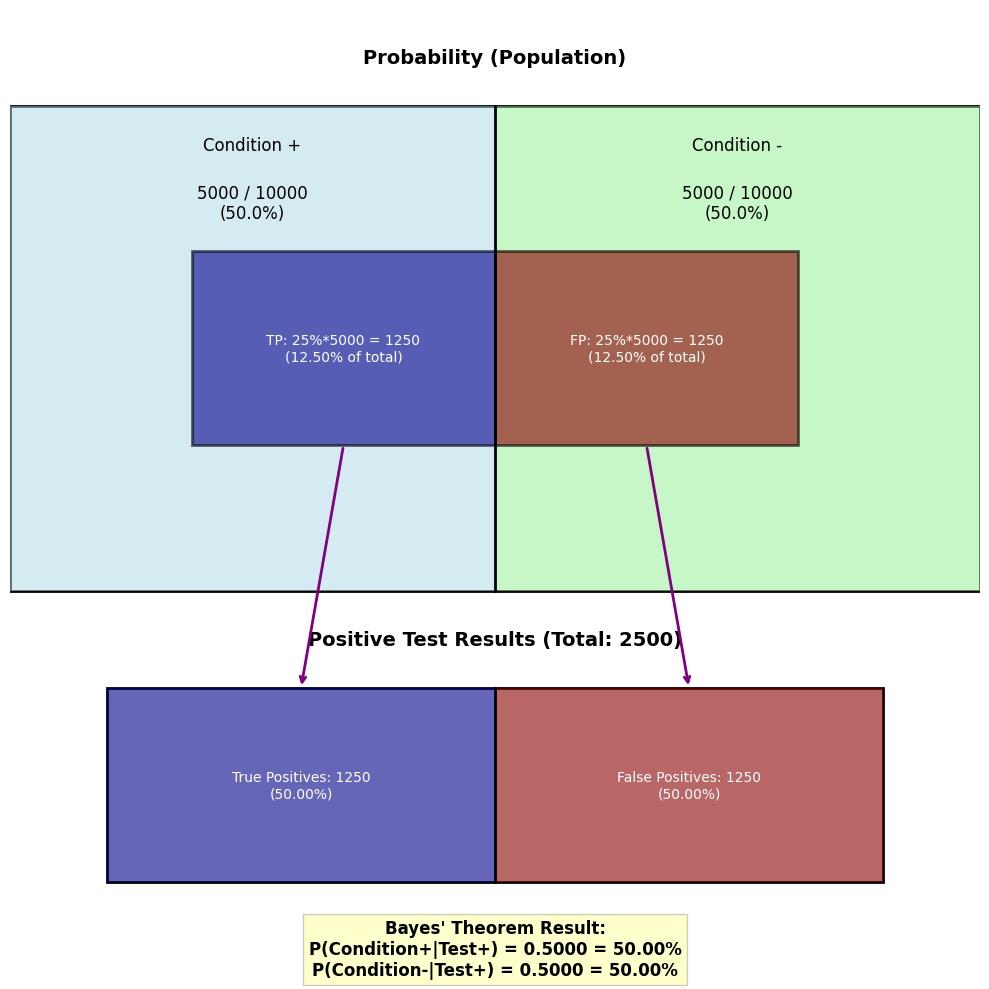

Posterior probability from visualization: 0.5000


In [ ]:
# Example useage function
def main():
    print("Bayes' Theorem Calculator with Visualization")
    print("-------------------------------------------")
    print("Bayes' Theorem: P(A|B) = [P(B|A) × P(A)] / P(B)")
    print()
    
    try:
        # Get inputs from user
        prior = float(input("Enter prior probability P(A) (e.g., 0.23 for disease prevalence): "))
        if not 0 <= prior <= 1:
            raise ValueError("Probability must be between 0 and 1")
            
        likelihood = float(input("Enter true positive rate P(B|A) (e.g., 0.85 for test sensitivity): "))
        if not 0 <= likelihood <= 1:
            raise ValueError("Probability must be between 0 and 1")
       
        alternative_likelihood = float(input("Enter false positive rate P(B|¬A) (e.g., 0.20 for false positive rate): "))
        if not 0 <= alternative_likelihood <= 1:
            raise ValueError("Probability must be between 0 and 1")
        
        population = int(input("Enter total population size for visualization (default 10000): ") or 10000)
        if population <= 0:
            raise ValueError("Population must be positive")
        
        # Calculate evidence probability
        evidence = calculate_evidence(prior, likelihood, alternative_likelihood)
        
        # Calculate posterior probability
        posterior = bayes_theorem(prior, likelihood, evidence)
        
        # Display numerical results
        print("\nNumerical Results:")
        print(f"Prior probability P(A): {prior:.4f}")
        print(f"True positive rate P(B|A): {likelihood:.4f}")
        print(f"False positive rate P(B|¬A): {alternative_likelihood:.4f}")
        print(f"Evidence P(B): {evidence:.4f}")
        print(f"Posterior probability P(A|B): {posterior:.4f}")
        
        # Visualize the results
        print("\nGenerating visualization...")
        visualize_posterior = visualize_bayes(prior, likelihood, alternative_likelihood, population)
        print(f"Posterior probability from visualization: {visualize_posterior:.4f}")
        
    except ValueError as e:
        print(f"Error: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")


if __name__ == "__main__":
    main()

# Binomial Probability

In [10]:
def binomial_probability(n: int, p: float, k: int) -> Tuple[float, None]:
    """
    Calculate binomial probability and optionally create visualization
    P(X = k) = C(n,k) * p^k * (1-p)^(n-k)
    
    Args:
        n (int): Number of trials
        p (float): Probability of success on each trial
        k (int): Number of successes
    
    Returns:
        Tuple[float, None]: (probability, None)
    """
    if not 0 <= p <= 1:
        raise ValueError("Probability must be between 0 and 1")
    if k > n:
        raise ValueError("Number of successes cannot exceed number of trials")
    
    probability = binom.pmf(k, n, p)
    return probability


In [11]:
def plot_binomial_distribution(n: int, p: float) -> None:
    """
    Create visualization of binomial probability distribution
    
    Args:
        n (int): Number of trials
        p (float): Probability of success on each trial
    """
    k = np.arange(0, n + 1)
    probabilities = binom.pmf(k, n, p)
    
    plt.figure(figsize=(10, 6))
    plt.bar(k, probabilities, alpha=0.8, color='blue')
    plt.title(f'Binomial Distribution (n={n}, p={p})')
    plt.xlabel('Number of Successes (k)')
    plt.ylabel('Probability')
    plt.grid(True, alpha=0.3)
    plt.show()

binomial probability (n=5, p=0.5, k=3): 0.31
\distribution plot:


<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_292328/2389188845.py:4: SyntaxWarning: invalid escape sequence '\d'
  print("\distribution plot:")


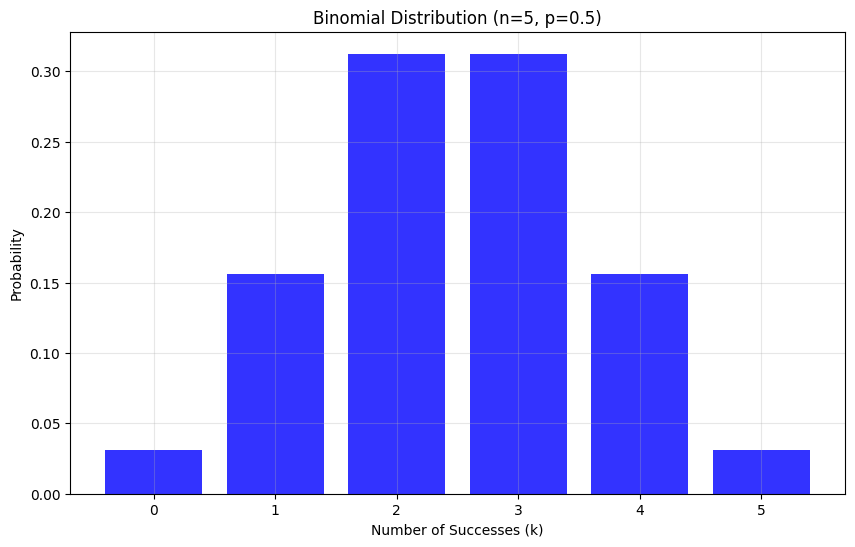

In [ ]:
bin_prob = binomial_probability(n=5, p=0.5, k=3)  # should be approximately 0.31
print(f"binomial probability (n=5, p=0.5, k=3): {bin_prob:.2f}")

print("\distribution plot:")
plot_binomial_distribution(n=5, p=0.5)  # Will display plot

# Bernoulli Trials

In [13]:
def bernoulli_trial(p: float) -> int:
    """
    Simulate a single Bernoulli trial
    
    Args:
        p (float): Probability of success
    
    Returns:
        int: 1 for success, 0 for failure
    """
    if not 0 <= p <= 1:
        raise ValueError("Probability must be between 0 and 1")
    return 1 if np.random.random() < p else 0

In [14]:
bern_result = bernoulli_trial(p=0.7)  # will be either 0 or 1
print("bernoulli trial (p=0.7):", bern_result)

bernoulli trial (p=0.7): 1


## Bernoulli process

In [ ]:

def bernoulli_process(p: float, n: int) -> np.ndarray:
    """
    Simulate a Bernoulli process (sequence of Bernoulli trials)
    
    Args:
        p (float): Probability of success for each trial
        n (int): Number of trials to simulate
        
    Returns:
        np.ndarray: Array of 0s and 1s representing the outcomes
    """
    if not 0 <= p <= 1:
        raise ValueError("Probability must be between 0 and 1")
    if n <= 0:
        raise ValueError("Number of trials must be positive")
        
    # Vectorized implementation for efficiency
    return np.random.random(n) < p

def visualize_bernoulli_process(outcomes: np.ndarray, p: float):
    """
    Visualize a Bernoulli process
    
    Args:
        outcomes (np.ndarray): Array of 0s and 1s representing trial outcomes
        p (float): Probability of success used in the simulation
    """
    n = len(outcomes)
    
        
    # Print summary statistics
    print(f"Bernoulli Process Summary (p={p}, n={n}):")
    print(f"Expected successes: {p*n:.2f}")
    print(f"Observed successes: {np.sum(outcomes)}")
    print(f"Expected success rate: {p:.4f}")
    print(f"Observed success rate: {np.mean(outcomes):.4f}")

    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    # Plot 1: Cumulative successes
    cumulative_successes = np.cumsum(outcomes)
    expected_cumulative = np.arange(1, n+1) * p
    
    ax1.plot(range(1, n+1), cumulative_successes, 'b-', label='Observed successes')
    ax1.plot(range(1, n+1), expected_cumulative, 'r--', label=f'Expected (p={p})')
    ax1.set_title('Cumulative Successes in Bernoulli Process')
    ax1.set_xlabel('Number of Trials')
    ax1.set_ylabel('Number of Successes')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Success rate convergence
    success_rates = np.zeros(n)
    for i in range(n):
        if i == 0:
            success_rates[i] = outcomes[i]
        else:
            success_rates[i] = np.mean(outcomes[:i+1])
    
    ax2.plot(range(1, n+1), success_rates, 'g-', label='Observed success rate')
    ax2.axhline(y=p, color='r', linestyle='--', label=f'True probability (p={p})')
    ax2.set_title('Convergence of Success Rate to True Probability')
    ax2.set_xlabel('Number of Trials')
    ax2.set_ylabel('Success Rate')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()



Bernoulli Process Summary (p=0.3, n=1000):
Expected successes: 300.00
Observed successes: 300
Expected success rate: 0.3000
Observed success rate: 0.3000


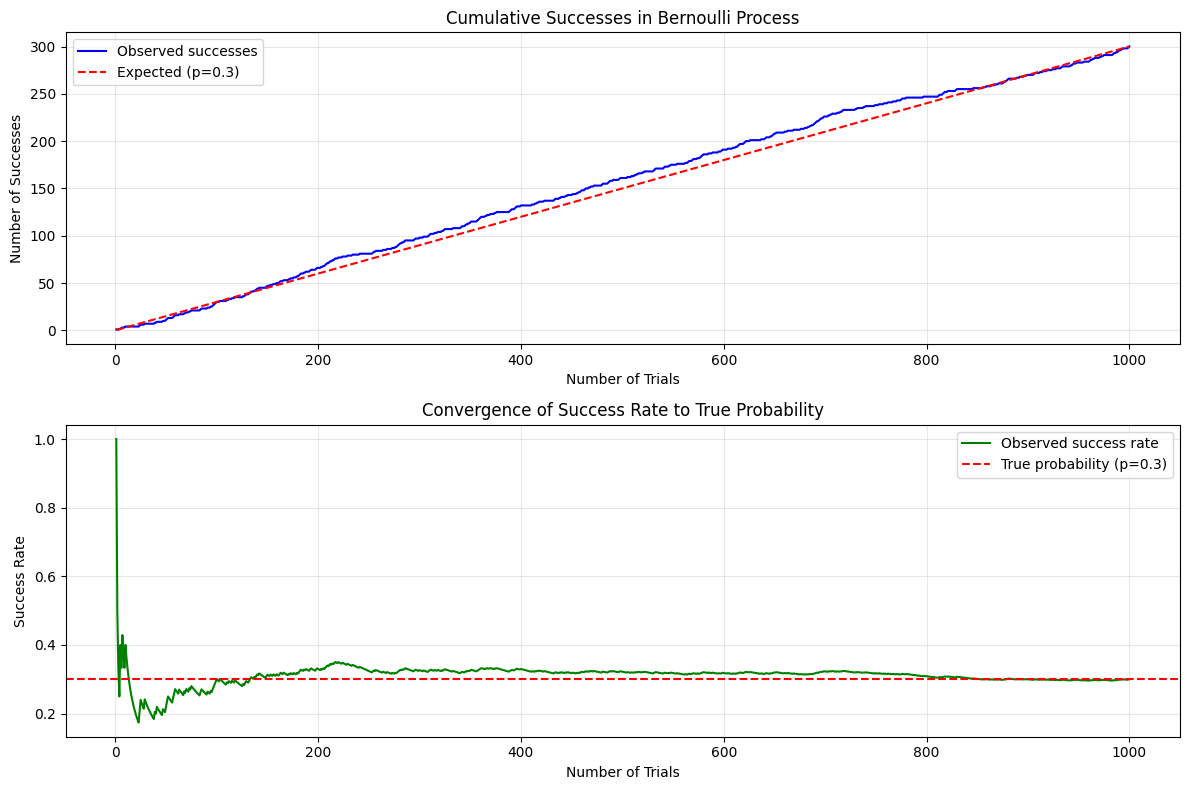

Bernoulli Process Summary (p=0.3, n=1000):
Expected successes: 300.00
Observed successes: 300
Expected success rate: 0.3000
Observed success rate: 0.3000


In [4]:
# Set parameters
p = 0.3  # probability of success
n = 1000  # number of trials

# Run Bernoulli process
outcomes = bernoulli_process(p, n)

# Visualize results
visualize_bernoulli_process(outcomes, p)

# Geometric Probability

In [15]:
def geometric_probability(p: float, k: int) -> Tuple[float, None]:
    """
    Calculate geometric probability and optionally create visualization
    P(X = k) = p * (1-p)^(k-1)
    
    Args:
        p (float): Probability of success
        k (int): Number of trials until first success
    
    Returns:
        Tuple[float, None]: (probability, None)
    """
    if not 0 <= p <= 1:
        raise ValueError("Probability must be between 0 and 1")
    if k < 1:
        raise ValueError("Number of trials must be at least 1")
    
    probability = geom.pmf(k, p)
    return probability

def plot_geometric_distribution(p: float, max_k: int = 20) -> None:
    """
    Create visualization of geometric probability distribution
    
    Args:
        p (float): Probability of success
        max_k (int): Maximum number of trials to plot
    """
    k = np.arange(1, max_k + 1)
    probabilities = geom.pmf(k, p)
    
    plt.figure(figsize=(10, 6))
    plt.bar(k, probabilities, alpha=0.8, color='green')
    plt.title(f'Geometric Distribution (p={p})')
    plt.xlabel('Number of Trials Until First Success (k)')
    plt.ylabel('Probability')
    plt.grid(True, alpha=0.3)
    plt.show()

geometric probability (p=0.2, k=3): 0.13

Distribution plot:


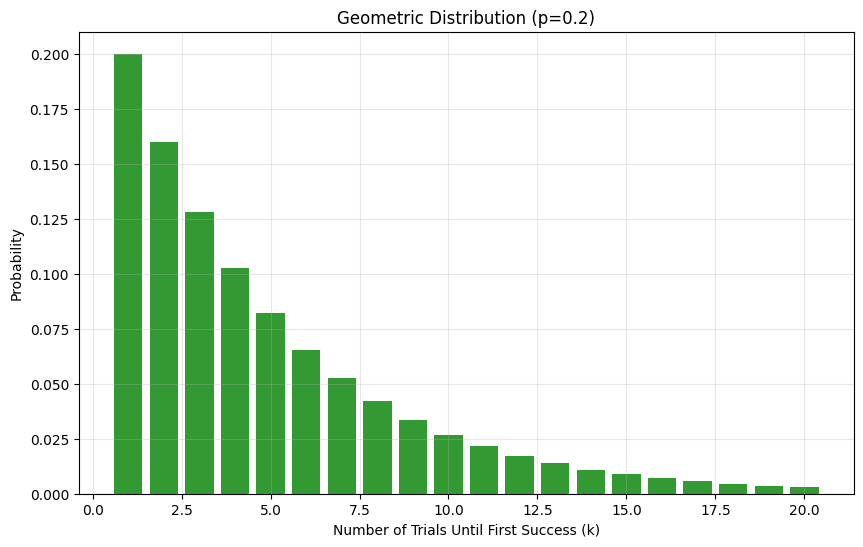

In [16]:
geom_prob = geometric_probability(p=0.2, k=3)  # should be approximately 0.13
print(f"geometric probability (p=0.2, k=3): {geom_prob:.2f}")

print("\nDistribution plot:")
plot_geometric_distribution(p=0.2)  # Will display plot

# Probability Density Function (PDF) of normal distribution

In [17]:
def plot_normal_distribution(mean: float, std_dev: float, value: float) -> float:
    """
    Plot a normal distribution and show probability of finding a specific value
    
    Args:
        mean (float): Mean of the distribution
        std_dev (float): Standard deviation of the distribution
        value (float): Value to find probability for
    
    Returns:
        float: Probability density at the specified value
    """
    # Create points for the bell curve
    x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
    y = norm.pdf(x, mean, std_dev)
    
    # Calculate probability density at the specified value
    prob_density = norm.pdf(value, mean, std_dev)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Plot the bell curve
    plt.plot(x, y, 'b-', label='Normal Distribution')
    
    # Fill the area up to the value
    x_fill = x[x <= value]
    y_fill = norm.pdf(x_fill, mean, std_dev)
    plt.fill_between(x_fill, y_fill, alpha=0.3, color='blue')
    
    # Mark the specific value
    plt.plot([value], [prob_density], 'ro', label=f'Value: {value}')
    
    # Add vertical line at the value
    plt.axvline(x=value, color='r', linestyle='--', alpha=0.3)
    
    # Calculate cumulative probability
    cumulative_prob = norm.cdf(value, mean, std_dev)
    
    # Add labels and title
    plt.title(f'Normal Distribution (μ={mean}, σ={std_dev})')
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    
    # Add text box with probabilities
    text = f'Value: {value:.2f}\n'
    text += f'Probability Density: {prob_density:.4f}\n'
    text += f'Cumulative Probability: {cumulative_prob:.2%}'
    plt.text(0.95, 0.95, text,
             transform=plt.gca().transAxes,
             verticalalignment='top',
             horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return prob_density

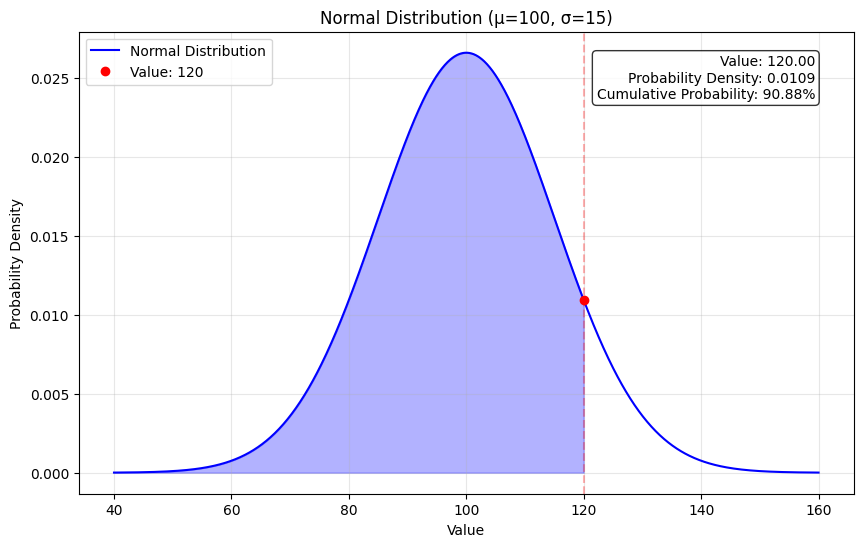


Probability density at 120: 0.0109


In [18]:
mean = 100
std_dev = 15
value = 120

probability = plot_normal_distribution(mean, std_dev, value)
print(f"\nProbability density at {value}: {probability:.4f}")

# P-value

In [19]:
def calculate_p_value(mean: float, std_dev: float, observed_value: float, two_tailed: bool = True) -> tuple:
    """
    Calculate and visualize p-value for given parameters
    
    Args:
        mean (float): Null hypothesis mean
        std_dev (float): Standard deviation
        observed_value (float): Observed test statistic
        two_tailed (bool): If True, calculates two-tailed p-value
    
    Returns:
        tuple: (p_value, plot)
    """
    # Calculate z-score
    z_score = (observed_value - mean) / std_dev
    
    # Calculate p-value
    if two_tailed:
        p_value = 2 * (1 - norm.cdf(abs(z_score)))
    else:
        # One-tailed: use left or right tail based on observed value
        if observed_value > mean:
            p_value = 1 - norm.cdf(z_score)  # Right-tailed
        else:
            p_value = norm.cdf(z_score)  # Left-tailed
    
    # Create visualization
    x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
    y = norm.pdf(x, mean, std_dev)
    
    plt.figure(figsize=(12, 6))
    
    # Plot the normal distribution
    plt.plot(x, y, 'b-', label='Normal Distribution')
    
    # Shade p-value region(s)
    if two_tailed:
        # Shade both tails
        critical_value = abs(observed_value - mean)
        x_left = x[x <= mean - critical_value]
        x_right = x[x >= mean + critical_value]
        plt.fill_between(x_left, norm.pdf(x_left, mean, std_dev), 
                        color='red', alpha=0.3, label='p-value region')
        plt.fill_between(x_right, norm.pdf(x_right, mean, std_dev), 
                        color='red', alpha=0.3)
    else:
        # Shade one tail
        if observed_value > mean:
            x_tail = x[x >= observed_value]
            plt.fill_between(x_tail, norm.pdf(x_tail, mean, std_dev), 
                           color='red', alpha=0.3, label='p-value region')
        else:
            x_tail = x[x <= observed_value]
            plt.fill_between(x_tail, norm.pdf(x_tail, mean, std_dev), 
                           color='red', alpha=0.3, label='p-value region')
    
    # Add vertical line at observed value
    plt.axvline(x=observed_value, color='r', linestyle='--', 
                label=f'Observed Value: {observed_value}')
    
    # Add text box with statistics
    text = f'Observed Value: {observed_value:.2f}\n'
    text += f'Mean (H₀): {mean:.2f}\n'
    text += f'Standard Deviation: {std_dev:.2f}\n'
    text += f'Z-score: {z_score:.2f}\n'
    text += f'p-value: {p_value:.4f}\n'
    text += f'Test Type: {"Two-tailed" if two_tailed else "One-tailed"}'
    
    plt.text(0.95, 0.95, text,
             transform=plt.gca().transAxes,
             verticalalignment='top',
             horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.title('P-value Visualization')
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return p_value



Two-tailed test:


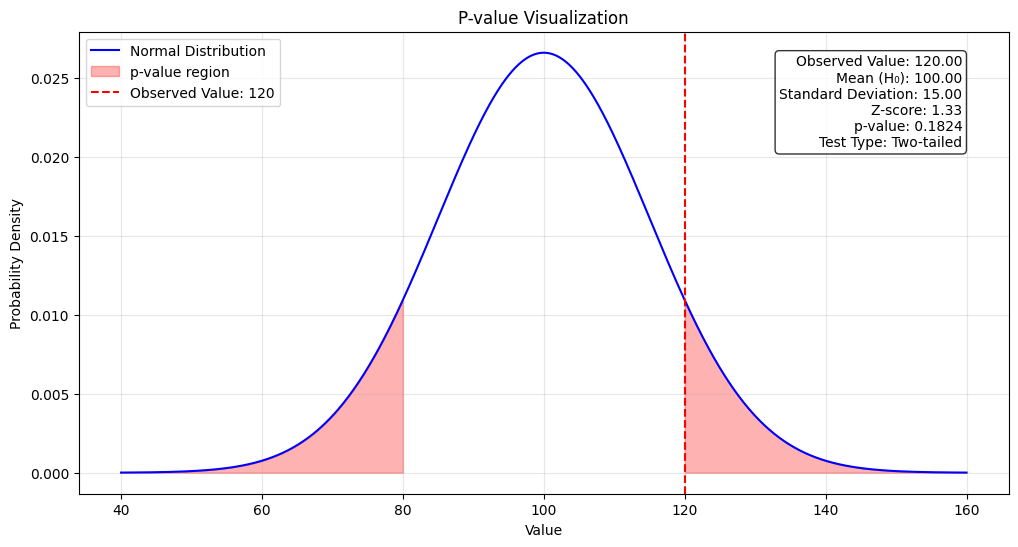

Two-tailed p-value: 0.1824
(% chance to get a result just like that or even more extreme: 18.24%)

One-tailed test:


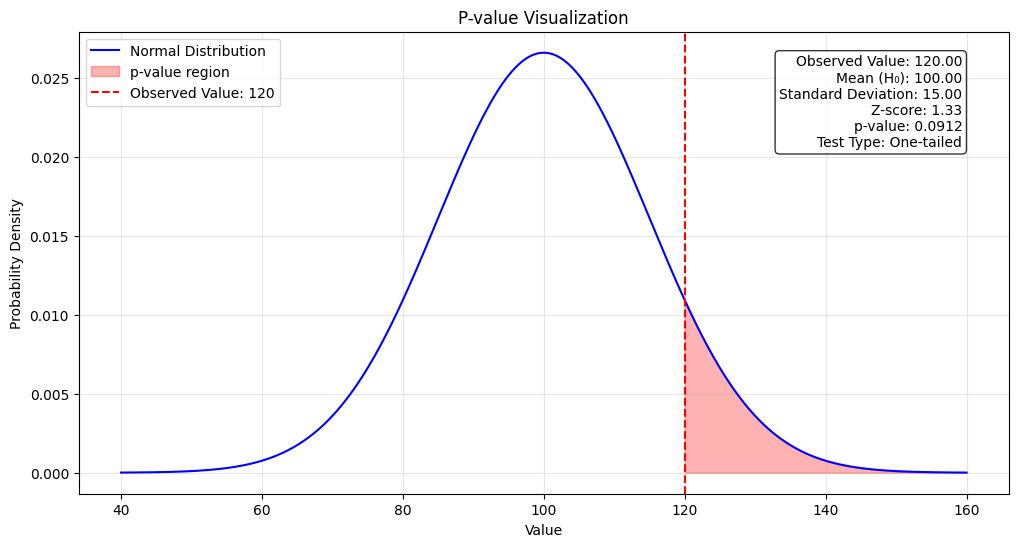

One-tailed p-value: 0.0912
(% chance to get a result just like that or even more extreme: 9.12%)


In [20]:
# Example usage
# Let's calculate p-values for both one-tailed and two-tailed tests
mean = 100
std_dev = 15
observed_value = 120

# Two-tailed test
print("\nTwo-tailed test:")
p_value_two = calculate_p_value(mean, std_dev, observed_value, two_tailed=True)
print(f"Two-tailed p-value: {p_value_two:.4f}")
print(f"(% chance to get a result just like that or even more extreme: {p_value_two*100:.2f}%)")

# One-tailed test
print("\nOne-tailed test:")
p_value_one = calculate_p_value(mean, std_dev, observed_value, two_tailed=False)
print(f"One-tailed p-value: {p_value_one:.4f}")
print(f"(% chance to get a result just like that or even more extreme: {p_value_one*100:.2f}%)")

# Card game probability

Uses monte carlo method (determine chance of something happening by running a computer algorithm a bunch of times and counting the number of 'successes')

* only does poker probability for now (both 2 card and 4 card poker)
* checks if standard deck. If so, it'll use the created standard deck for the monte carlo method.
* *we'll work on situations with a non-standard deck later (as well as other card games)

In [ ]:
# Build a standard 52-card deck.
def get_deck():
    return [r+s for r in "23456789TJQKA" for s in "cdhs"]

# Convert card's rank to numeric value.
def card_value(card):
    return "23456789TJQKA".index(card[0]) + 2

# Evaluate a 5-card hand and return a tuple (hand_category, tie-breakers).
def evaluate_five(cards):
    r = sorted([card_value(c) for c in cards], reverse=True)
    s = [c[1] for c in cards]
    flush = len(set(s)) == 1
    sr = sorted(r)
    straight = False; high_straight = None
    if len(set(r)) == 5:
        if sr[-1] - sr[0] == 4:
            straight, high_straight = True, sr[-1]
        elif sr == [2, 3, 4, 5, 14]:
            straight, high_straight = True, 5
    counts = {}
    for v in r:
        counts[v] = counts.get(v, 0) + 1
    items = sorted(counts.items(), key=lambda x: (x[1], x[0]), reverse=True)
    # Categories: 9=Straight Flush, 8=Four-of-a-Kind, 7=Full House, 6=Flush,
    # 5=Straight, 4=Three-of-a-Kind, 3=Two Pair, 2=One Pair, 1=High Card.
    if flush and straight:
        return (9, high_straight)
    if items[0][1] == 4:
        four = items[0][0]
        kicker = [v for v in r if v != four][0]
        return (8, four, kicker)
    if items[0][1] == 3 and len(counts) == 2:
        return (7, items[0][0], items[1][0])
    if flush:
        return (6,) + tuple(r)
    if straight:
        return (5, high_straight)
    if items[0][1] == 3:
        triple = items[0][0]
        kickers = sorted([v for v in r if v != triple], reverse=True)
        return (4, triple) + tuple(kickers)
    if len(counts) == 3 and items[0][1] == 2 and items[1][1] == 2:
        high_pair = max(items[0][0], items[1][0])
        low_pair = min(items[0][0], items[1][0])
        kicker = [v for v in r if v != high_pair and v != low_pair][0]
        return (3, high_pair, low_pair, kicker)
    if len(counts) == 4 and items[0][1] == 2:
        pair = items[0][0]
        kickers = sorted([v for v in r if v != pair], reverse=True)
        return (2, pair) + tuple(kickers)
    return (1,) + tuple(r)

# For more than 5 cards, determine the best 5-card hand.
def best_hand(cards):
    return max((evaluate_five(combo) for combo in itertools.combinations(cards, 5)), default=None)

# Run the simulation.
def simulate(your_cards, opp_known, num_opponents, community_cards, sims=10000):
    num_hole = len(your_cards)
    results = {i: 0 for i in range(1, 10)}  # your hand categories counts.
    opp_better = 0
    opp_known_better = {opp: 0 for opp in opp_known} if opp_known else {}
    opp_known_results = {opp: {cat: 0 for cat in range(1, 10)} for opp in opp_known} if opp_known else {}
    for _ in range(sims):
        deck = get_deck()
        used = your_cards + community_cards
        for cards in opp_known.values():
            used += cards
        deck = [c for c in deck if c not in used]
        random.shuffle(deck)
        comm = community_cards.copy()
        while len(comm) < 5:
            comm.append(deck.pop())
        opp_hands = []
        for i in range(1, num_opponents + 1):
            if opp_known and i in opp_known:
                opp_hands.append(opp_known[i])
            else:
                opp_hands.append([deck.pop() for _ in range(num_hole)])
        your_best = best_hand(your_cards + comm)
        results[your_best[0]] += 1
        any_better = False
        for i, opp in enumerate(opp_hands, start=1):
            opp_best = best_hand(opp + comm)
            if opp_known and i in opp_known:
                opp_known_results[i][opp_best[0]] += 1
            if opp_best > your_best:
                any_better = True
                if opp_known and i in opp_known:
                    opp_known_better[i] += 1
        if any_better:
            opp_better += 1
    prob = {k: (v / sims * 100) for k, v in results.items()}
    opp_prob = opp_better / sims * 100
    opp_known_prob = {k: (v / sims * 100) for k, v in opp_known_better.items()} if opp_known else {}
    opp_known_dist = {opp: {cat: (cnt / sims * 100) for cat, cnt in dist.items()} for opp, dist in opp_known_results.items()} if opp_known else {}
    return prob, opp_prob, opp_known_prob, opp_known_dist

# Map hand category to name.
def hand_name(cat):
    names = {1: "High Card", 2: "One Pair", 3: "Two Pair", 4: "Three of a Kind",
             5: "Straight", 6: "Flush", 7: "Full House", 8: "Four of a Kind",
             9: "Straight Flush"}
    return names.get(cat, "Unknown")

# Example usage:
if __name__ == "__main__":
    sims = 10000
    # Your hole cards.
    your_cards = ["Ah", "Kh"]
    # Number of opponents.
    num_opponents = 3
    # No community cards revealed.
    community_cards = []
    # Opponent 1's known cards; opponents 2 and 3 are unknown.
    opp_known = {1: ["Qh", "Qs"]}
    
    print("Running simulation...")
    prob, opp_prob, opp_known_prob, opp_known_dist = simulate(your_cards, opp_known, num_opponents, community_cards, sims)
    
    print("\nYour Hand Probabilities:")
    for cat in range(1, 10):
        print(f"{hand_name(cat)}: {prob[cat]:.2f}%")

    if opp_known_dist:
        for opp, dist in opp_known_dist.items():
            print(f"\nOpponent {opp} (known cards) hand probabilities:")
            for cat in range(1, 10):
                print(f"{hand_name(cat)}: {dist[cat]:.2f}%")


    print(f"\nChance an opponent has a better hand: {opp_prob:.2f}%")
    
    if opp_known_prob:
        for opp, p in opp_known_prob.items():
            print(f"Opponent {opp} (known cards)'s chance of a better hand: {p:.2f}%")
    


Running simulation...

Your Hand Probabilities:
High Card: 18.32%
One Pair: 43.14%
Two Pair: 23.72%
Three of a Kind: 4.57%
Straight: 2.27%
Flush: 5.52%
Full House: 2.31%
Four of a Kind: 0.15%
Straight Flush: 0.00%

Opponent 1 (known cards) hand probabilities:
High Card: 0.00%
One Pair: 35.06%
Two Pair: 39.90%
Three of a Kind: 12.31%
Straight: 1.57%
Flush: 1.75%
Full House: 8.67%
Four of a Kind: 0.72%
Straight Flush: 0.02%

Chance an opponent has a better hand: 64.72%
Opponent 1 (known cards)'s chance of a better hand: 54.58%
